# CLASSIFICATION ON CIFAR 10 USING CNN 

## Import libraries

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Show some samples

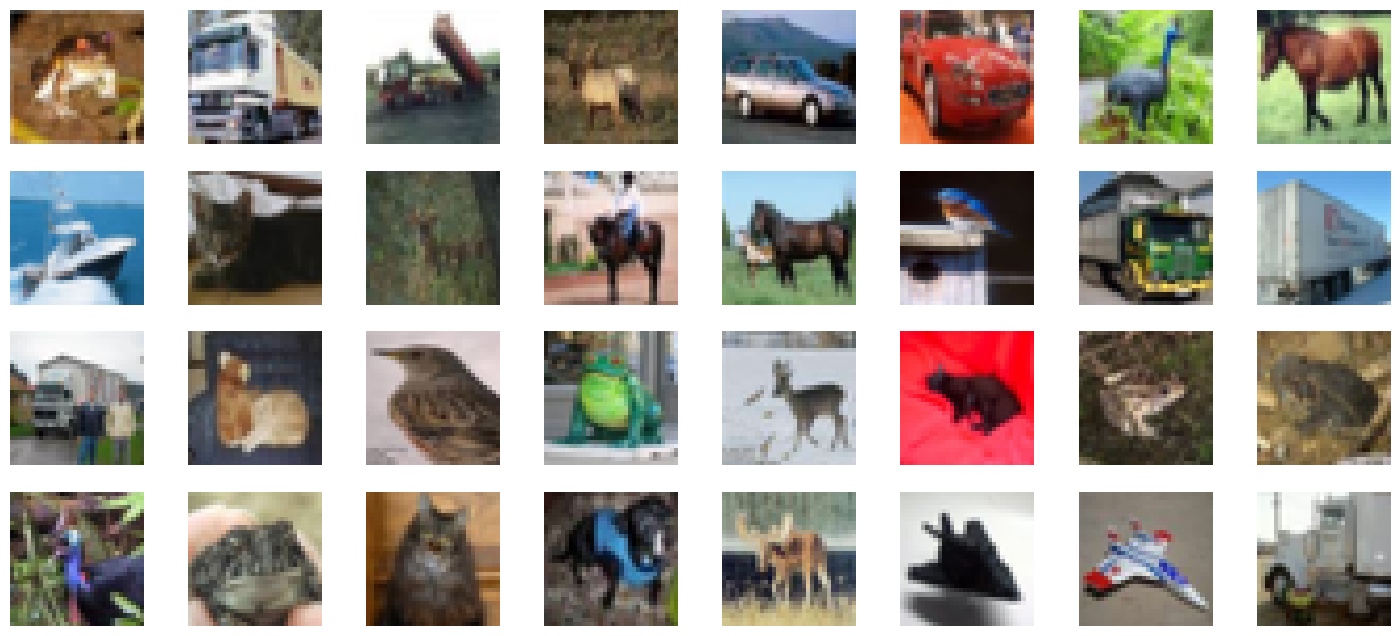

In [3]:
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i, :, :])
    plt.axis("off")

## Data preprocessing

In [4]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Define model

In [5]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #-----------------------------------
    # Input shape
    #-----------------------------------
    model.add(Input(input_shape))
    
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

## Create model

In [7]:
# Create the model.
model_dropout = cnn_model()
model_dropout.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile model

In [8]:
model_dropout.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

## Train model

In [9]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=256,
                            epochs=30,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 628ms/step - accuracy: 0.1614 - loss: 2.2312 - val_accuracy: 0.3313 - val_loss: 1.8638
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 145s 649ms/step - accuracy: 0.3261 - loss: 1.8534 - val_accuracy: 0.4244 - val_loss: 1.5822
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 630ms/step - accuracy: 0.4043 - loss: 1.6409 - val_accuracy: 0.4685 - val_loss: 1.4882
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 85s 619ms/step - accuracy: 0.4591 - loss: 1.4932 - val_accuracy: 0.5117 - val_loss: 1.3385
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 626ms/step - accuracy: 0.5024 - loss: 1.3808 - val_accuracy: 0.5189 - val_loss: 1.3269
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 85s 624ms/step - accuracy: 0.5421 - loss: 1.2884 - val_accuracy: 0.5957 - val_loss: 1.1299
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 648ms/step - accuracy: 0.5712 - loss: 1.1953 - val_accuracy: 0.5927 - val_loss: 1.1635
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 139s 624ms/step - accuracy: 0.5981 - loss:

## Plot Results

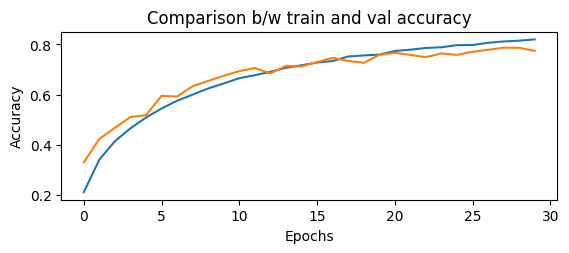

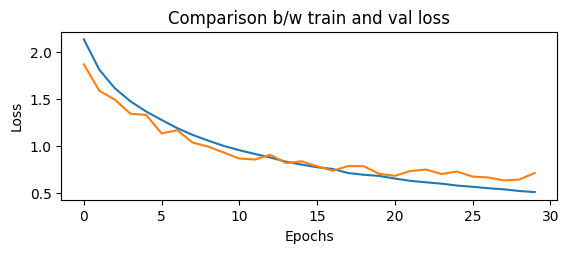

In [19]:
# Get training and validation results 
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.subplot(2,1,1)
plt.plot(train_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison b/w train and val accuracy")
plt.plot(val_acc)
plt.show()

# Plot training and validation loss
plt.subplot(2,1,2)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison b/w train and val loss")
plt.plot(val_loss)

plt.show()

## Save model

In [22]:
model_dropout.save('model_dropout.h5')

## Load model

In [23]:
from tensorflow.keras import models
model = models.load_model('model_dropout.h5')

## Evaluate model accuracy

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7728 - loss: 0.7071
Test accuracy: 76.980


## Plot 10 predictions

In [49]:
s = np.random.randint(100)
# Images to predict
data = X_test[s:s+10]
data_labels = y_test[s:s+10]

# Predict over images
predictions = model.predict(data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


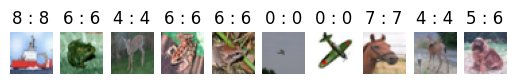

In [50]:
rows = 1
column = 10

for i in range(rows*column):
    plt.subplot(rows,column,i+1)
    plt.axis('off')
    plt.imshow(data[i])
    pred_idx = tf.argmax(predictions[i]).numpy()
    act_idx = np.nonzero(data_labels[i])
    act_idx = int(act_idx[0][0])
    plt.title(f"{act_idx} : {pred_idx}")


In [52]:
# Get model predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step


## Confusion matrix

In [53]:
# Get class labels from predictions
predicted_labels = [np.argmax(x) for x in predictions ]
# Convert One hot encoding back to int
actual_labels = tf.argmax(y_test,axis=1)
# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=actual_labels,predictions=predicted_labels)
print(conf_mat)


tf.Tensor(
[[816  20  24  21  12   5  14   4  40  44]
 [  6 927   0   4   1   1  11   2  10  38]
 [ 78   4 545  57  92  49 126  24   8  17]
 [ 20  11  33 597  66 115 105  25  13  15]
 [ 14   3  17  44 759  20  82  54   3   4]
 [ 10   5  18 178  46 633  47  49   4  10]
 [  5   5   9  29  20  12 910   2   4   4]
 [  9   4  16  34  54  31  16 820   2  14]
 [ 66  51   4  11   4   2  10   4 824  24]
 [ 22  73   1   9   1   3   8   7   9 867]], shape=(10, 10), dtype=int32)
